In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

## Data Visualization of the Titanic Incident

Mainly focusing the survival rates from majority of the columns in regards to both Sex (Male and Female) and the Classes (Upper, Middle, and Lower)

In [2]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Reliability

Displays the amount of rows and columns within the train data set. Additionally, displays whether the train data set contains or is missing sufficient data for reliability. Where row inputs are missing from columns Age, Cabin and Embarked.

In [3]:
data_train.shape

(891, 12)

In [4]:
data_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [5]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Survival Percentage

According to the bar plot displayed below, 40% passengers survived while the remaining 60% died.

Text(0.5, 1.0, 'Survived Percentage')

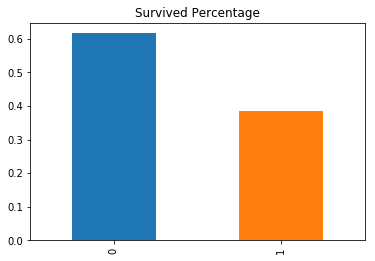

In [6]:
data_train.Survived.value_counts(normalize=True).plot.bar()
plt.title("Survived Percentage")

## Survival Regarding to Class

The Classes are divided into 3 different levels (1 = Upper Class, 2 = Middle Class, 3 = Lower Class). Where the table and chart both displays the survival rate for each individual class. In a descending order, the Upper class had the highest chance of survival (62%), Middle class had the 2nd highest chance of survival (47%), and Lower class having the lowest chance of survival (24%). (May be due to an Hierarchy system of wealth and status)

In [7]:
data_train[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


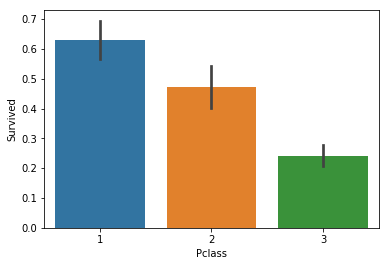

In [8]:
sns.barplot(x="Pclass", y="Survived",data=data_train);

## Survival Regarding Sex

Displays the percentages of either the Male or Female surviving. Where the Females have an 74% chance of survival and Males with about an 18% chance of survival. Indicating that the survival of Female is more important than the survival of male. But in relation towards class, the survival rates leads from Upper class to Middle class to Lower class.

In [9]:
data_train[["Sex","Survived"]].groupby(["Sex"], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


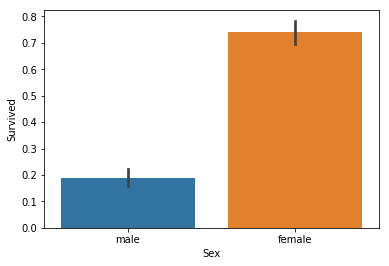

In [10]:
sns.barplot(x="Sex",y="Survived",data=data_train);

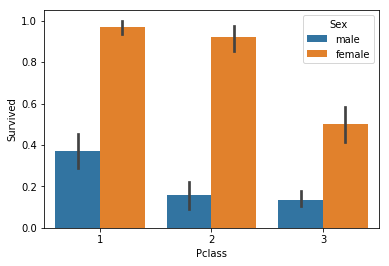

In [11]:
sns.barplot(x="Pclass",y="Survived", hue="Sex",data=data_train);

## Survival Regarding Age

From the count displayed at the beginning of notebook, 177 inputs of age were missing from the data set. Therefore we convert integers into string and classified values between -1 and 0 as "Missing" after converting null values to a numerical value between the range. Resulting in an influx of an high survival rate on infants (70%), Teens including both Young Adults and Adults with an survival rate of 40%, leaving the rest to be rates of 22% - 30%.

In [12]:
data_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
def name_ages(df, sections, group_names):
    df.Age=df.Age.fillna(-0.2)
    df["Age_categories"] = pd.cut(df.Age, sections, labels=group_names)
    return df

sections = (-1, 0, 5, 12, 18, 21, 35, 60, 120)
group_names = ["Missing","Infant","Child","Teen","College","Y.Adult", "Adult", "Senior"]

train= name_ages(data_train,sections, group_names)
test = name_ages(data_test, sections, group_names)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Y.Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Y.Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Y.Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Y.Adult


In [14]:
data_train[["Age_categories","Survived"]].groupby(["Age_categories"], as_index=False).mean()

,Age_categories,Survived
0,Missing,0.293785
1,Infant,0.704545
2,Child,0.360000
3,Teen,0.428571
4,College,0.261538
5,Y.Adult,0.409556
6,Adult,0.400000
7,Senior,0.227273


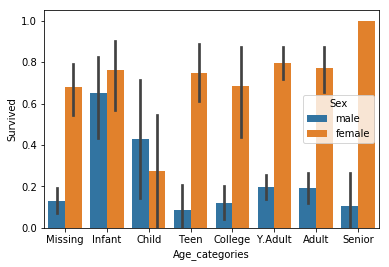

In [15]:
sns.barplot(x="Age_categories", y="Survived", hue="Sex", data=data_train);

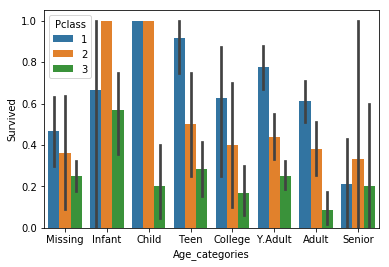

In [16]:
sns.barplot(x="Age_categories", y="Survived", hue="Pclass", data=data_train);

## Survival Regarding Sibling/Spouse

According to the data, none of the passengers have any siblings above 4 resulting in an 0% survival rate and showing that passengers of either 1 or 2 Sib/Sp have 53% and 46% survival rate. While ones without either are more likely to survive (34%) compared to ones with 3 (25%) and 4 (16%). Another notable fact is that 1st and 2nd class passengers only have 0 - 3 Sib/Sp while 3rd class have 0 - 4 Sib/Sp. 

In [17]:
data_train[["SibSp","Survived"]].groupby(["SibSp"], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


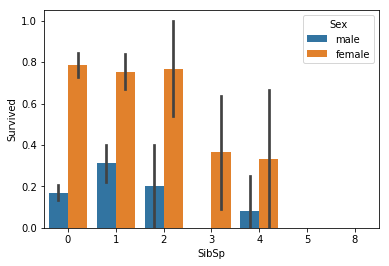

In [18]:
sns.barplot(x="SibSp", y = "Survived", hue = "Sex",data=data_train);

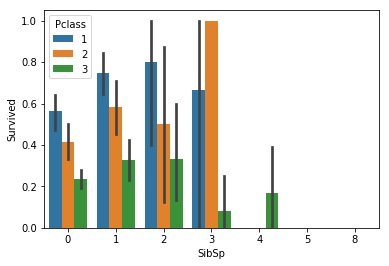

In [19]:
sns.barplot(x="SibSp", y = "Survived", hue = "Pclass",data=data_train);

## Survival Regarding Parents & Children

Parch with a value of 3 has an survival rate of 60% while parch with 1 and 2 children are both around 50% survival rate, parch with 5 childrens are 20% and ones who are with their nanny (0) have a rate of 34%. Like all others plots, Females are the most prominent sex to survive. In addition like the scenario of Sibling and Spouse, 1st class passengers only have 0 - 2 parch, 2nd class passengers only have 0 - 3 parch, and 3rd class passengers ranges from 0 - 3 and 5 parch.

In [20]:
data_train[["Parch", "Survived"]].groupby(["Parch"],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


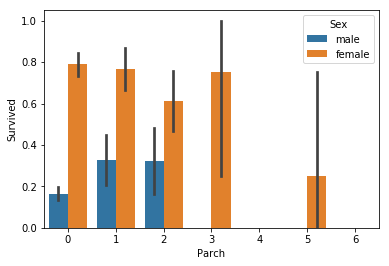

In [21]:
sns.barplot(x="Parch", y="Survived", hue="Sex", data=data_train);

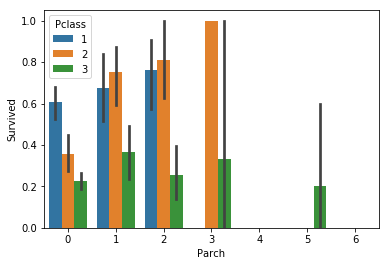

In [22]:
sns.barplot(x="Parch",y="Survived",hue="Pclass",data=data_train);

## Survival Regarding Embarkment

Passengers who embarked on Cherbourg had the highest chance of survival (55%) compared to passengers who embarked on Queenstown(38%) and passengers who embarked on Southampton (33%). Where majority of 1st class passengers embarked on Southampton, majority of 2nd class embarked on Queenstown, majority of 3rd class passengers embarked on both Cherbourg and Queenstown. 

In [23]:
data_train[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


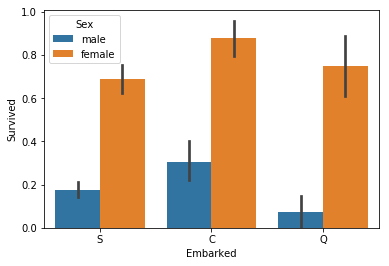

In [24]:
sns.barplot(x="Embarked",y="Survived", hue="Sex", data=data_train);

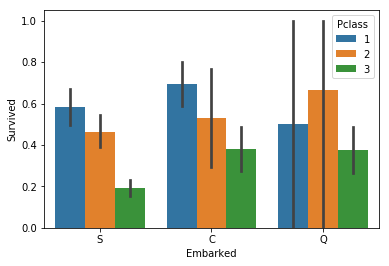

In [25]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass",data=data_train);

## Theory

In all the graphs representing different columns and survival rates, Females are mainly the ones who survived the Titanic. Regardless of their class, this may be due to the standard of "ladies first" or Male's characteristic of an gentlemen for allowing Females to aboard the lifeboats. 